# **Project: Policygenius Data Assignment**
# **By: Wajdan Mahbub**

### **Import Packages and Data**

In [ ]:
# Import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [ ]:
# Import two csv files

funnel_df = pd.read_csv('/content/funnel_path.csv')
users_df = pd.read_csv('/content/users.csv')

### **Funnel Path Dataframe**

In [ ]:
# Create order column for funnel steps and reset DataFrame's index
funnel_order_dict= { 'funnel_steps': ['started_navigator', 'collect_contact_info', 'viewed_quotes', 'application_submit', 'phone_connect', 'sign_and_exam'],
                      'Order':  [1,2,3,4,5,6]}

funnel_order_dict_df = pd.DataFrame(funnel_order_dict)

funnel_df= funnel_df.merge(funnel_order_dict_df, on= 'funnel_steps', how= 'inner')
funnel_df= funnel_df.sort_values(['user_id', 'Order'], ascending=[True, True])
funnel_df= funnel_df.reset_index(drop= True)


In [ ]:
# Funnel Dataframe

funnel_df.head()

,user_id,funnel_steps,Order
0,1001,started_navigator,1
1,1001,collect_contact_info,2
2,1002,started_navigator,1
3,1002,collect_contact_info,2
4,1002,viewed_quotes,3


In [ ]:
# Funnel Info

funnel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27629 entries, 0 to 27628
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       27629 non-null  int64 
 1   funnel_steps  27629 non-null  object
 2   Order         27629 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 647.7+ KB


In [ ]:
# Check for duplicate records

funnel_dup = funnel_df.duplicated().any()
print(funnel_dup)

False


There are no missing data in the funnel dataframe. 

In [ ]:
# Funnel Shape

funnel_df.shape 

(27629, 3)

In [ ]:
# Funnel Columns

funnel_df.columns

Index(['user_id', 'funnel_steps', 'Order'], dtype='object')

## **Users Dataframe**

In [ ]:
# Users Dataframe

users_df.head()

,user_id,age,device,income,num_conditions,premium,marketing_channels
0,1001,56,desktop,157490,5,2490.123774,instagram
1,1002,34,desktop,138171,3,1906.228442,paid_search_nb
2,1003,32,desktop,94274,2,1515.217172,paid_search_nb
3,1004,32,desktop,160480,4,2263.763328,tv
4,1005,33,desktop,141943,3,1624.410806,podcast


In [ ]:
# Users Info

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             10000 non-null  int64  
 1   age                 10000 non-null  int64  
 2   device              10000 non-null  object 
 3   income              10000 non-null  int64  
 4   num_conditions      10000 non-null  int64  
 5   premium             10000 non-null  float64
 6   marketing_channels  10000 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 547.0+ KB


In [ ]:
# Checking for duplicate records

users_dup = users_df.duplicated().any()
print(users_dup)

False


There are no duplicate records in the users dataframe.

In [ ]:
# Users Shape

users_df.shape

(10000, 7)

In [ ]:
# Users Columns

users_df.columns

Index(['user_id', 'age', 'device', 'income', 'num_conditions', 'premium',
       'marketing_channels'],
      dtype='object')

## **Funnel Path and Users DataFrames Merged**

In [ ]:
# Merging Funnel Path and Users Dataframes
df1 = funnel_df.merge(users_df, on='user_id', how= 'inner', validate= 'many_to_one')

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27629 entries, 0 to 27628
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             27629 non-null  int64  
 1   funnel_steps        27629 non-null  object 
 2   Order               27629 non-null  int64  
 3   age                 27629 non-null  int64  
 4   device              27629 non-null  object 
 5   income              27629 non-null  int64  
 6   num_conditions      27629 non-null  int64  
 7   premium             27629 non-null  float64
 8   marketing_channels  27629 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 2.1+ MB


### **Exploratory Data Analysis**

In [ ]:
# Num Conditions Series
num_conditions_df= users_df.groupby('num_conditions')['user_id'].count()

# Device Series
device_df= users_df.groupby('device')['user_id'].count()

#Marketing Channel Series
marketing_channels_df= users_df.groupby('marketing_channels')['user_id'].count()


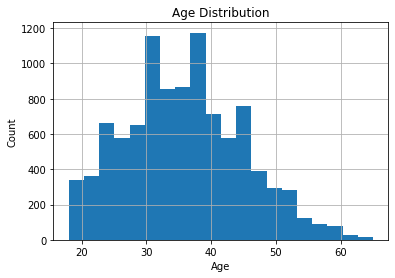

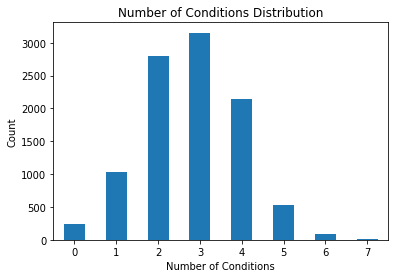

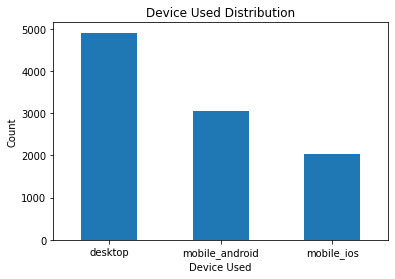

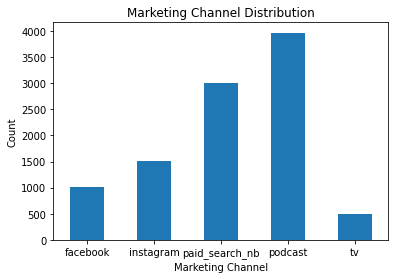

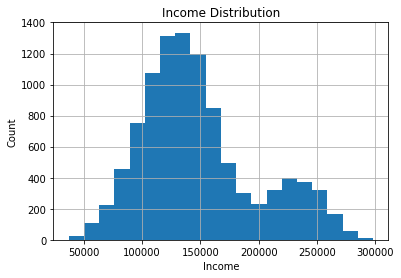

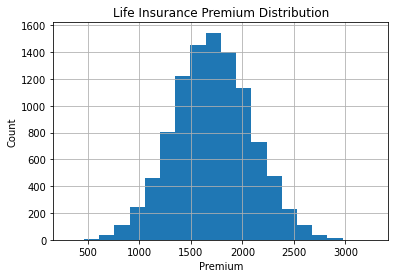

In [ ]:
# Age Histogram
users_df['age'].hist(bins= 20)
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Num Conditions Bar Graph
num_conditions_df.plot(kind= 'bar', x='num_conditions', y='user_id');
plt.xlabel('Number of Conditions')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Number of Conditions Distribution')
plt.show()

# Device Bar Graph
device_df.plot(kind= 'bar', x='device', y='user_id');
plt.xlabel('Device Used')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Device Used Distribution')
plt.show()

# Marketing Channel Bar Graph
marketing_channels_df.plot(kind= 'bar', x='marketing_channels', y='user_id');
plt.xlabel('Marketing Channel')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Marketing Channel Distribution')
plt.show()

# Income Histogram
users_df['income'].hist(bins= 20)
plt.xlabel('Income')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show()

# Life Insurance Premium Histogram
users_df['premium'].hist(bins= 20)
plt.xlabel('Premium')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Life Insurance Premium Distribution')
plt.show()



### **Life Insurance Funnel**

In [ ]:
# Dataframe
df2= df1.pivot_table(values= 'user_id', index = ['Order', 'funnel_steps'], aggfunc= 'count')
df3= df2.diff(periods=1, axis=0)
df4= df2.pct_change()*100

df5= df2.merge(df3, on= ['Order', 'funnel_steps'], how= 'inner').merge(df4, on= ['Order', 'funnel_steps'], how= 'inner')
new_cols= {'user_id_x': 'Count_Users', 'user_id_y': 'Delta', 'user_id': 'Percent_Change'}
df5.rename(columns= new_cols, inplace= True)

df5.head(7)

,,Count_Users,Delta,Percent_Change
Order,funnel_steps,,,
1,started_navigator,10000,NaN,NaN
2,collect_contact_info,7220,-2780.0,-27.800000
3,viewed_quotes,5245,-1975.0,-27.354571
4,application_submit,2855,-2390.0,-45.567207
5,phone_connect,1525,-1330.0,-46.584939
6,sign_and_exam,784,-741.0,-48.590164


In [ ]:
# Funnel
df6= df5.reset_index(drop= False)

fig = go.Figure(go.Funnel(y = df6['funnel_steps'], x = df6['Count_Users'],  textposition = "inside",
    textinfo = "value + percent initial" ))

fig.update_layout(
    title={
        'text': "Life Insurance Funnel",
        'y':0.88,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(font_size=14)
fig.show()

### **Life Insurance Funnel by Marketing Channel**

In [ ]:
# DataFrame 

df2_mkt= df1.pivot_table(values= 'user_id', index = ['Order', 'funnel_steps'], columns= 'marketing_channels', aggfunc= 'count')
df3_mkt= df2_mkt.diff(periods=1, axis=0)
df4_mkt= df2_mkt.pct_change()*100

df5_mkt= df2_mkt.merge(df3_mkt, on= ['Order', 'funnel_steps'], how= 'inner').merge(df4_mkt, on= ['Order', 'funnel_steps'], how= 'inner')
new_cols= {'facebook_x': 'FB_Count',
           'instagram_x': 'IG_Count',
           'paid_search_nb_x': 'PS_Count',
           'podcast_x': 'PD_Count',
           'tv_x':'TV_Count',
           'facebook_y':'FB_Delta',
           'instagram_y': 'IG_Delta',
           'paid_search_nb_y': 'PS_Delta',
           'podcast_y': 'PD_Delta',
           'tv_y': 'TV_Delta',
           'facebook': 'FB_Pct_Change',
           'instagram':'IG_Pct_Change',
           'paid_search_nb': 'PS_Pct_Change',
           'podcast': 'PD_Pct_Change',
           'tv': 'TV_Pct_Change'}

df5_mkt.rename(columns= new_cols, inplace= True)
df5_mkt.head(7)

,marketing_channels,FB_Count,IG_Count,PS_Count,PD_Count,TV_Count,FB_Delta,IG_Delta,PS_Delta,PD_Delta,TV_Delta,FB_Pct_Change,IG_Pct_Change,PS_Pct_Change,PD_Pct_Change,TV_Pct_Change
Order,funnel_steps,,,,,,,,,,,,,,,
1,started_navigator,1021,1520,3002,3967,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,collect_contact_info,727,1093,2191,2848,361,-294.0,-427.0,-811.0,-1119.0,-129.0,-28.795299,-28.092105,-27.015323,-28.207714,-26.326531
3,viewed_quotes,534,782,1583,2073,273,-193.0,-311.0,-608.0,-775.0,-88.0,-26.547455,-28.453797,-27.749886,-27.212079,-24.376731
4,application_submit,288,419,847,1143,158,-246.0,-363.0,-736.0,-930.0,-115.0,-46.067416,-46.419437,-46.493999,-44.862518,-42.124542
5,phone_connect,179,218,568,444,116,-109.0,-201.0,-279.0,-699.0,-42.0,-37.847222,-47.971360,-32.939787,-61.154856,-26.582278
6,sign_and_exam,97,106,303,222,56,-82.0,-112.0,-265.0,-222.0,-60.0,-45.810056,-51.376147,-46.654930,-50.000000,-51.724138


In [ ]:
#Funnel
df6_mkt= df5_mkt.reset_index(drop= False)

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Instagram',
    y = df6_mkt['funnel_steps'],
    x = df6_mkt['IG_Count'],
    textposition= 'inside',
    textinfo = "value + percent initial"))

fig.add_trace(go.Funnel(
    name = 'Facebook',
    orientation = "h",
    y = df6_mkt['funnel_steps'],
    x = df6_mkt['FB_Count'],
    textposition = "inside",
    textinfo = "value + percent initial"))

fig.add_trace(go.Funnel(
    name = 'Paid Search',
    orientation = "h",
    y = df6_mkt['funnel_steps'],
    x = df6_mkt['PS_Count'],
    textposition = "inside",
    textinfo = "value + percent initial"))

fig.add_trace(go.Funnel(
    name = 'Podcast',
    orientation = "h",
    y = df6_mkt['funnel_steps'],
    x = df6_mkt['PD_Count'],
    textposition = "inside",
    textinfo = "value + percent initial"))

fig.add_trace(go.Funnel(
    name = 'TV',
    orientation = "h",
    y = df6_mkt['funnel_steps'],
    x = df6_mkt['TV_Count'],
    textposition = "inside",
    textinfo = "value+percent initial"))

fig.update_layout(font_size=15)

fig.update_layout(
    title={
        'text': "Marketing Channel Funnel Breakdown",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

### **Marketing Channel & Overall Conversion Rates**

In [ ]:
# Conversion Rates

Conversion_Rate= round(df5['Count_Users'].values[5]/ df5['Count_Users'].values[0]*100,2)
Conversion_Rate_FB= round(df6_mkt['FB_Count'].values[5]/ df6_mkt['FB_Count'].values[0]*100,2)
Conversion_Rate_IG= round(df6_mkt['IG_Count'].values[5]/ df6_mkt['IG_Count'].values[0]*100,2)
Conversion_Rate_PS= round(df6_mkt['PS_Count'].values[5]/ df6_mkt['PS_Count'].values[0]*100,2)
Conversion_Rate_PD= round(df6_mkt['PD_Count'].values[5]/ df6_mkt['PD_Count'].values[0]*100,2)
Conversion_Rate_TV= round(df6_mkt['TV_Count'].values[5]/ df6_mkt['TV_Count'].values[0]*100,2)

dict_cr = {'Marketing_Channel': ['Overall Average', 'Facebook', 'Instagram', 'Paid Search', 'Podcast', 'TV'], 
         'Conversion_Rate_%': [Conversion_Rate, Conversion_Rate_FB, Conversion_Rate_IG, Conversion_Rate_PS,Conversion_Rate_PD, Conversion_Rate_TV]}

df_cr= pd.DataFrame(dict_cr).sort_values('Conversion_Rate_%', ascending= False).reset_index(drop=True)
df_cr

,Marketing_Channel,Conversion_Rate_%
0,TV,11.43
1,Paid Search,10.09
2,Facebook,9.50
3,Overall Average,7.84
4,Instagram,6.97
5,Podcast,5.60


### **Funnel View by Marketing Channel & Device Type**

In [ ]:
# DataFrame

df2_dev_mkt= df1.pivot_table(values= 'user_id', index = ['Order', 'funnel_steps'], columns=['device', 'marketing_channels'] , aggfunc= 'count')
df3_dev_mkt= df2_dev_mkt.diff(periods=1, axis=0)
df4_dev_mkt= df2_dev_mkt.pct_change()*100

df2_dev_mkt.head(7)

device                      desktop                                        \
marketing_channels         facebook instagram paid_search_nb podcast   tv   
Order funnel_steps                                                          
1     started_navigator         487       747           1497    1927  246   
2     collect_contact_info      355       557           1119    1384  187   
3     viewed_quotes             273       390            828    1020  138   
4     application_submit        161       242            487     621   90   
5     phone_connect             104       136            331     244   69   
6     sign_and_exam              49        61            152     104   33   

device                     mobile_android                                   \
marketing_channels               facebook instagram paid_search_nb podcast   
Order funnel_steps                                                           
1     started_navigator               311       479            907    1216   
2     collect_contact_info            217       339            668     870   
3     viewed_quotes                   148       243            468     629   
4     application_submit               50        87            165     231   
5     phone_connect                    31        38            102      83   
6     sign_and_exam                    10        12             33      21   

device                          mobile_ios                                   \
marketing_channels           tv   facebook instagram paid_search_nb podcast   
Order funnel_steps                                                            
1     started_navigator     148        223       294            598     824   
2     collect_contact_info  103        155       197            404     594   
3     viewed_quotes          82        113       149            287     424   
4     application_submit     36         77        90            195     291   
5     phone_connect          27         44        44            135     117   
6     sign_and_exam           6         38        33            118      97   

device                          
marketing_channels          tv  
Order funnel_steps              
1     started_navigator     96  
2     collect_contact_info  71  
3     viewed_quotes         53  
4     application_submit    32  
5     phone_connect         20  
6     sign_and_exam         17

In [ ]:
# Percent change between funnel steps
df2_dev_mkt.head(7).pct_change()*100

device                        desktop                                       \
marketing_channels           facebook  instagram paid_search_nb    podcast   
Order funnel_steps                                                           
1     started_navigator           NaN        NaN            NaN        NaN   
2     collect_contact_info -27.104723 -25.435074     -25.250501 -28.178516   
3     viewed_quotes        -23.098592 -29.982047     -26.005362 -26.300578   
4     application_submit   -41.025641 -37.948718     -41.183575 -39.117647   
5     phone_connect        -35.403727 -43.801653     -32.032854 -60.708535   
6     sign_and_exam        -52.884615 -55.147059     -54.078550 -57.377049   

device                                mobile_android             \
marketing_channels                 tv       facebook  instagram   
Order funnel_steps                                                
1     started_navigator           NaN            NaN        NaN   
2     collect_contact_info -23.983740     -30.225080 -29.227557   
3     viewed_quotes        -26.203209     -31.797235 -28.318584   
4     application_submit   -34.782609     -66.216216 -64.197531   
5     phone_connect        -23.333333     -38.000000 -56.321839   
6     sign_and_exam        -52.173913     -67.741935 -68.421053   

device                                                          mobile_ios  \
marketing_channels         paid_search_nb    podcast         tv   facebook   
Order funnel_steps                                                           
1     started_navigator               NaN        NaN        NaN        NaN   
2     collect_contact_info     -26.350606 -28.453947 -30.405405 -30.493274   
3     viewed_quotes            -29.940120 -27.701149 -20.388350 -27.096774   
4     application_submit       -64.743590 -63.275040 -56.097561 -31.858407   
5     phone_connect            -38.181818 -64.069264 -25.000000 -42.857143   
6     sign_and_exam            -67.647059 -74.698795 -77.777778 -13.636364   

device                                                                      
marketing_channels          instagram paid_search_nb    podcast         tv  
Order funnel_steps                                                          
1     started_navigator           NaN            NaN        NaN        NaN  
2     collect_contact_info -32.993197     -32.441472 -27.912621 -26.041667  
3     viewed_quotes        -24.365482     -28.960396 -28.619529 -25.352113  
4     application_submit   -39.597315     -32.055749 -31.367925 -39.622642  
5     phone_connect        -51.111111     -30.769231 -59.793814 -37.500000  
6     sign_and_exam        -25.000000     -12.592593 -17.094017 -15.000000

In [ ]:
# Conversion Rates by Marketing Channel and Device Type

# Numbers and Variables
Conversion_Rate_Android_FB= round(df2_dev_mkt[('mobile_android', 'facebook')].values[5]/ df2_dev_mkt[('mobile_android', 'facebook')].values[0]*100,2)
Conversion_Rate_Android_IG= round(df2_dev_mkt[('mobile_android', 'instagram')].values[5]/ df2_dev_mkt[('mobile_android', 'instagram')].values[0]*100,2)
Conversion_Rate_Android_PS= round(df2_dev_mkt[('mobile_android', 'paid_search_nb')].values[5]/ df2_dev_mkt[('mobile_android', 'paid_search_nb')].values[0]*100,2)
Conversion_Rate_Android_PD= round(df2_dev_mkt[('mobile_android', 'podcast')].values[5]/ df2_dev_mkt[('mobile_android', 'podcast')].values[0]*100,2)
Conversion_Rate_Android_TV= round(df2_dev_mkt[('mobile_android', 'tv')].values[5]/ df2_dev_mkt[('mobile_android', 'tv')].values[0]*100,2)

Conversion_Rate_IOS_FB= round(df2_dev_mkt[('mobile_ios', 'facebook')].values[5]/ df2_dev_mkt[('mobile_ios', 'facebook')].values[0]*100,2)
Conversion_Rate_IOS_IG= round(df2_dev_mkt[('mobile_ios', 'instagram')].values[5]/ df2_dev_mkt[('mobile_ios', 'instagram')].values[0]*100,2)
Conversion_Rate_IOS_PS= round(df2_dev_mkt[('mobile_ios', 'paid_search_nb')].values[5]/ df2_dev_mkt[('mobile_ios', 'paid_search_nb')].values[0]*100,2)
Conversion_Rate_IOS_PD= round(df2_dev_mkt[('mobile_ios', 'podcast')].values[5]/ df2_dev_mkt[('mobile_ios', 'podcast')].values[0]*100,2)
Conversion_Rate_IOS_TV= round(df2_dev_mkt[('mobile_ios', 'tv')].values[5]/ df2_dev_mkt[('mobile_ios', 'tv')].values[0]*100,2)

Conversion_Rate_Desk_FB= round(df2_dev_mkt[('desktop', 'facebook')].values[5]/ df2_dev_mkt[('desktop', 'podcast')].values[0]*100,2)
Conversion_Rate_Desk_IG= round(df2_dev_mkt[('desktop', 'instagram')].values[5]/ df2_dev_mkt[('desktop', 'instagram')].values[0]*100,2)
Conversion_Rate_Desk_PS= round(df2_dev_mkt[('desktop', 'paid_search_nb')].values[5]/ df2_dev_mkt[('desktop', 'paid_search_nb')].values[0]*100,2)
Conversion_Rate_Desk_PD= round(df2_dev_mkt[('desktop', 'podcast')].values[5]/ df2_dev_mkt[('desktop', 'podcast')].values[0]*100,2)
Conversion_Rate_Desk_TV= round(df2_dev_mkt[('desktop', 'tv')].values[5]/ df2_dev_mkt[('desktop', 'tv')].values[0]*100,2)

# DataFrame
dict_desk_mkt_cr = {'Device_Type_&_Marketing_Channel': 
                    ['Overall Average', 'Android - Facebook', 'Android - Instagram', 'Android - Paid Search', 'Android - Podcast', 'Android - TV', 
                     'iOS - Facebook', 'iOS - Instagram', 'iOS - Paid Search', 'iOS - Podcast', 'iOS - TV', 
                     'Desktop - Facebook', 'Desktop - Instagram', 'Desktop - Paid Search', 'Desktop - Podcast', 'Desktop - TV'] ,
                    
                    'Conversion_Rate_%': 
                    [Conversion_Rate, Conversion_Rate_Android_FB, Conversion_Rate_Android_IG, Conversion_Rate_Android_PS, Conversion_Rate_Android_PD, Conversion_Rate_Android_TV,
                     Conversion_Rate_IOS_FB, Conversion_Rate_IOS_IG, Conversion_Rate_IOS_PS, Conversion_Rate_IOS_PD, Conversion_Rate_IOS_TV,
                     Conversion_Rate_Desk_FB, Conversion_Rate_Desk_IG, Conversion_Rate_Desk_PS, Conversion_Rate_Desk_PD, Conversion_Rate_Desk_TV]}

df_desk_mkt_cr= pd.DataFrame(dict_desk_mkt_cr).sort_values('Conversion_Rate_%', ascending= False).reset_index(drop=True)
df_desk_mkt_cr



,Device_Type_&_Marketing_Channel,Conversion_Rate_%
0,iOS - Paid Search,19.73
1,iOS - TV,17.71
2,iOS - Facebook,17.04
3,Desktop - TV,13.41
4,iOS - Podcast,11.77
5,iOS - Instagram,11.22
6,Desktop - Paid Search,10.15
7,Desktop - Instagram,8.17
8,Overall Average,7.84
9,Desktop - Podcast,5.40


### **Scenario Analysis (Save 40%, 50% or 60% of Customers at Each Stage)**

In [ ]:
# User Churn numbers for different scenarios

micro_df= df2_dev_mkt.iloc[: ,[6,8]]

a=df2_dev_mkt[('mobile_android', 'instagram')].values[0]
b=df2_dev_mkt[('mobile_android', 'instagram')].values[1]
c=df2_dev_mkt[('mobile_android', 'instagram')].values[2]

e=df2_dev_mkt[('mobile_android', 'podcast')].values[0]
f=df2_dev_mkt[('mobile_android', 'podcast')].values[1]
g=df2_dev_mkt[('mobile_android', 'podcast')].values[2]


micro_df[('mobile_android', 'instagram_save_60%')] = [a,b,c, round(c*0.6,0) , round(c*0.6**2,0), round(c*0.6**3,0)]
micro_df[('mobile_android', 'podcast_save_60%')] = [e,f,g, round(g*0.6,0) , round(g*0.6**2,0), round(g*0.6**3,0)]

micro_df[('mobile_android', 'instagram_save_50%')] =[a,b,c,round(c*0.5,0) , round(c*0.5**2,0), round(c*0.5**3,0)]
micro_df[('mobile_android', 'podcast_save_50%')] =[e,f,g, round(g*0.5,0) , round(g*0.5**2,0), round(g*0.5**3,0)]

micro_df[('mobile_android', 'instagram_save_40%')] = [a,b,c, round(c*0.4,0) , round(c*0.4**2,0), round(c*0.4**3,0)]
micro_df[('mobile_android', 'podcast_save_40%')] = [e,f,g, round(g*0.4,0) , round(g*0.4**2,0), round(g*0.4**3,0)]

micro_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

device                     mobile_android                             \
marketing_channels              instagram podcast instagram_save_60%   
Order funnel_steps                                                     
1     started_navigator               479    1216              479.0   
2     collect_contact_info            339     870              339.0   
3     viewed_quotes                   243     629              243.0   
4     application_submit               87     231              146.0   
5     phone_connect                    38      83               87.0   
6     sign_and_exam                    12      21               52.0   

device                                                          \
marketing_channels         podcast_save_60% instagram_save_50%   
Order funnel_steps                                               
1     started_navigator              1216.0              479.0   
2     collect_contact_info            870.0              339.0   
3     viewed_quotes                   629.0              243.0   
4     application_submit              377.0              122.0   
5     phone_connect                   226.0               61.0   
6     sign_and_exam                   136.0               30.0   

device                                                          \
marketing_channels         podcast_save_50% instagram_save_40%   
Order funnel_steps                                               
1     started_navigator              1216.0              479.0   
2     collect_contact_info            870.0              339.0   
3     viewed_quotes                   629.0              243.0   
4     application_submit              314.0               97.0   
5     phone_connect                   157.0               39.0   
6     sign_and_exam                    79.0               16.0   

device                                       
marketing_channels         podcast_save_40%  
Order funnel_steps                           
1     started_navigator              1216.0  
2     collect_contact_info            870.0  
3     viewed_quotes                   629.0  
4     application_submit              252.0  
5     phone_connect                   101.0  
6     sign_and_exam                    40.0

In [ ]:
# Calculating Conversion Rates

ig_den= micro_df.iloc[0,0]
pd_den= micro_df.iloc[0,1]

default_ig= micro_df.iloc[5,0]/ig_den*100
default_pd= micro_df.iloc[5,1]/pd_den*100

sixty_ig= micro_df.iloc[5,2]/ig_den*100
sixty_pd= micro_df.iloc[5,3]/pd_den*100

fifty_ig= micro_df.iloc[5,4]/ig_den*100
fifty_pd= micro_df.iloc[5,5]/pd_den*100

forty_ig= micro_df.iloc[5,6]/ig_den*100
forty_pd= micro_df.iloc[5,7]/pd_den*100

# Scenario DataFrame 

# The scenarios involve saving 40%, 50% or 60% of customers at each stage after 'Viewed Quotes'

micro_dict = {'Scenarios': 
                    ['Android - Instagram - Default', 'Android - Podcast - Default', 
                     'Android - Instagram - save 60%', 'Android - Podcast - save 60%', 
                     'Android - Instagram - save 50%', 'Android - Podcast - save 50%', 
                     'Android - Instagram - save 40%', 'Android - Podcast - save 40%'],
                    
                    'Conversion_Rate_%': 
                    [default_ig, default_pd, sixty_ig, sixty_pd, fifty_ig, fifty_pd, forty_ig, forty_pd]}

df_scenario= pd.DataFrame(micro_dict).sort_values('Conversion_Rate_%', ascending= False).reset_index(drop=True)
df_scenario

,Scenarios,Conversion_Rate_%
0,Android - Podcast - save 60%,11.184211
1,Android - Instagram - save 60%,10.855950
2,Android - Podcast - save 50%,6.496711
3,Android - Instagram - save 50%,6.263048
4,Android - Instagram - save 40%,3.340292
5,Android - Podcast - save 40%,3.289474
6,Android - Instagram - Default,2.505219
7,Android - Podcast - Default,1.726974


### **User Demographics by Marketing Channel and Device Type**

In [ ]:
# Obtaining Customer demographic information by Marketing Channel and Device type

df_android= df1[(df1['device']=='mobile_android') & ((df1['marketing_channels']=='instagram') | (df1['marketing_channels']=='podcast'))]
df_android_pivot= pd.pivot_table(data=df_android, values= ['age', 'income', 'premium'], index = ['Order', 'funnel_steps'], columns='marketing_channels' , aggfunc= {'age': 'mean','premium': 'mean','income':'mean'})
df_android_pivot['premium/income_IG'] = df_android_pivot[('premium', 'instagram')] / df_android_pivot[('income', 'instagram')]*100
df_android_pivot['premium/income_PD'] = df_android_pivot[('premium', 'podcast')] / df_android_pivot[('income', 'podcast')]*100

df_ios= df1[(df1['device']=='mobile_ios') & ((df1['marketing_channels']=='instagram') | (df1['marketing_channels']=='podcast'))]
df_ios_pivot= pd.pivot_table(data=df_ios, values= ['age', 'income', 'premium'], index = ['Order', 'funnel_steps'], columns='marketing_channels' , aggfunc= {'age': 'mean', 'premium': 'mean','income':'mean'})
df_ios_pivot['premium/income_IG'] = df_ios_pivot[('premium', 'instagram')] / df_ios_pivot[('income', 'instagram')]*100
df_ios_pivot['premium/income_PD'] = df_ios_pivot[('premium', 'podcast')] / df_ios_pivot[('income', 'podcast')]*100

df_desktop= df1[(df1['device']=='desktop') & ((df1['marketing_channels']=='instagram') | (df1['marketing_channels']=='podcast'))]
df_desktop_pivot= pd.pivot_table(data=df_desktop, values= ['age', 'income', 'premium'], index = ['Order', 'funnel_steps'], columns='marketing_channels' , aggfunc= {'age': 'mean', 'premium': 'mean','income':'mean'})
df_desktop_pivot['premium/income_IG'] = df_desktop_pivot[('premium', 'instagram')] / df_desktop_pivot[('income', 'instagram')]*100
df_desktop_pivot['premium/income_PD'] = df_desktop_pivot[('premium', 'podcast')] / df_desktop_pivot[('income', 'podcast')]*100


In [ ]:
# Android Users
df_android_pivot.iloc[[5]]


age                    income                 \
marketing_channels   instagram    podcast      instagram        podcast   
Order funnel_steps                                                        
6     sign_and_exam  30.583333  37.809524  107178.166667  118871.619048   

                        premium              premium/income_IG  \
marketing_channels    instagram      podcast                     
Order funnel_steps                                               
6     sign_and_exam  1460.41036  1438.708688          1.362601   

                    premium/income_PD  
marketing_channels                     
Order funnel_steps                     
6     sign_and_exam          1.210305

In [ ]:
# iOS Users
df_ios_pivot.iloc[[5]]

age                    income                 \
marketing_channels   instagram    podcast      instagram        podcast   
Order funnel_steps                                                        
6     sign_and_exam  38.363636  37.587629  234484.848485  235089.103093   

                         premium              premium/income_IG  \
marketing_channels     instagram      podcast                     
Order funnel_steps                                                
6     sign_and_exam  1805.053091  1878.117144          0.769795   

                    premium/income_PD  
marketing_channels                     
Order funnel_steps                     
6     sign_and_exam          0.798896

In [ ]:
# Desktop Users

df_desktop_pivot.iloc[[5]]

age                income                 \
marketing_channels   instagram podcast     instagram        podcast   
Order funnel_steps                                                    
6     sign_and_exam  33.786885   34.75  136579.57377  141202.865385   

                         premium              premium/income_IG  \
marketing_channels     instagram      podcast                     
Order funnel_steps                                                
6     sign_and_exam  1479.066607  1544.044349          1.082934   

                    premium/income_PD  
marketing_channels                     
Order funnel_steps                     
6     sign_and_exam          1.093494

## **Question & Answers**

**1.	The first step in providing recommendations is to start with a high-level analysis. (Please present this answer visually)**


>> **A) How does our conversion rate change through the funnel overall and by marketing channels?**






Overall, the conversion rate is 7.84% for the life insurance product. Significant drops in customer conversion occur from viewed quotes to application submit (46% drop), application submit to phone connect (47% drop), and phone connect to sign and exam (49% drop).  

When the conversion rate is analyzed by marketing channel, TV, Paid Search, and Facebook have conversion rates of 11.43%, 10.09%, and 9.5%. These numbers are substantially above the average conversion rate of 7.84%. Instagram and Podcasts have conversion rates of 6.97% and 5.6%. Furthermore, all marketing channels experience significant drops in customer conversion at each step, from viewed quotes to sign and exam. 

In the last stage of the product funnel (phone connect to sign and exam), Instagram, TV, and Podcasts experience large drops, approximately 50%, in customer conversion. This drop drags down the overall conversion rate and the conversion rates for the three marketing channels. 

**2.	The second step in providing recommendations is to look at conversion at a segment level through the funnel. (Approach this from a model-based perspective)**

>>**A)	Which features are associated with people converting through the funnel?**


When the conversion rate is analyzed through the lens of marketing channel and device type, it is clear that users of iOS-powered devices have above-average conversion rates. The top three are iOS users who come to Policygenius through Paid Search, TV, and Facebook. The conversion rates for these three groups are 19.73%, 17.71%, and 17.04%. Even in the two worst performing marketing channels, iOS users from Podcasts and Instagram have conversion rates of 11.77% and 11.22%, which are much higher than the overall conversion rate of 7.84%.

On the opposite end of the spectrum, users of Android-powered devices have the lowest conversion rates. Four of the bottom five conversion rates come from Android users. The two worst conversion rates belong to Android users who come to Policygenius through Podcasts (1.73%) and Instagram (2.51%).

When customer demographics for iOS, Android, and Desktop users are observed, iOS and Desktop users have higher incomes than Android users. The higher income results in a lower premium-to-income ratio for iOS and Desktop customers. The positive correlation between income and conversion rate, with respect to device type and marketing channel, is an area that needs to be further investigated.

**3. What hypotheses do you take away from the funnel and segmentation analysis above?**

>>**A)	What recommendations would you make to the product team?**

As Android customers from Podcasts and Instagram have the two worst conversion rates, I would work with the Product team to make adjustments that increase the conversion rate for this subset of users. I would recommend that the Product team develop a better pricing strategy and product recommendation. Pricing and product have to cater to the specific income level and needs of Android users.  

On a larger scale, I would work with the Product team to analyze the exchange between customers and insurance agents, and see if the step from phone connect to sign and exam can be improved. This needs to be done to prevent many Android and Desktop customers from dropping off at this stage of the process. Analyzing the conversation between iOS users and insurance agents could potentially yield insights that can be used to improve the conversion rate for Android and Desktop users. 

>>**B)	How would you test your recommendations?**

To test recommendations individually, we would devise an A/B test. To test multiple recommendations simultaneously, we would develop a multivariate test. 

For example, a product choice A/B test would involve one set of Android users (control group) seeing the current product listings and another set of users (test group) seeing a new set of product listings that cater to their demographics. This A/B test will be applied to the Podcast and Instagram marketing channels. To avoid bias, the experiment will run for one month on randomly selected and equally balanced samples. At the end of the test, the results will be evaluated to see how changing the product selection impacted conversion rates. 

>>**C)	What recommendations are likely to drive the largest impact?**

Improving the conversion rate between phone connect and sign and exam for Android and Desktop users will likely have the biggest impact. However, this recommendation can potentially take longer to implement as a lot of text data needs to be analyzed between insurance agents and customers.

Improving the pricing and product recommendations for Android users coming from Instagram and Podcasts will be easier to implement and evaluate. If the findings from this recommendation are successfully applied to all Android marketing channels, then it can potentially have a more significant impact.

Using the scenario table from above as a reference, if the targeted approach reaches a 50% (middle outcome) save rate for Android users coming in from Instagram and Podcasts, the conversion rate for the respective marketing channels jump to 6.5% and 6.3%. 

**4.	What are the caveats of your analysis?**

The recommendations are based on data that is assumed to be randomly sampled and accurate. Furthermore, the sample used in this analysis is a representative sample of the population of life insurance customers. 

As no date range is given for the data, it is assumed that all the observations occurred during the same time period. 

It is assumed that actual people, not bots, clicked on the ads from the various marketing channels, or that bot traffic was filtered out when preparing this dataset. 



**5.	If you had more time and resources to develop this analysis further.**

>>**A)	What additional attributes would you want to gain more insight about optimizing conversion?**

I want to add in attributes such as customer gender, time and date of purchase, name of insurance provider selected, time taken to receive a call from an insurance agent, length of call with an insurance agent,  actual premium rate chosen, the reason for purchase and types of insurance already purchased.

Finally, I would like to have data on the cost of ads in each marketing channel, and the revenue Poligycenius receives from each purchase.  


>>**B) What other ways could you expand this work?**

I want to run a Principal Component Analysis (PCA) to remove attributes that do not impact purchases. If date and historic data were provided, I could create a machine learning model to predict future purchases. I would experiment with random forests, decision trees, and gradient boosted trees to see which model has the lowest root mean squared error and r2 value. This would be useful for making financial projections and planning capital expenditure. It would also be helpful for workforce planning, as there needs to be an adequate number of insurance agents ready to call customers.

Finally, using the cost and revenue data, I can run a cost-benefit analysis of each recommendation. 
